# Econ 281: Computational Tools in Macroeconomics

### Homework 1: Introduction to Dynamic Programming

##### Youngdoo Choi (yoc005@ucsd.edu), April 2024

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar
import time

---

### Problem 1: Cake-eating Problem

1. What is the state variable?

\begin{equation*}
x: \text{the cake remaining at the start of each period}
\end{equation*}

2. Set up the Bellman Equation

\begin{equation*}
V(x) = max_{x^\prime} \; ln(c) + \beta V(x^\prime)
\end{equation*}

\begin{equation*}
\text{s.t.} \; c + x^\prime = (1-\delta)x
\end{equation*}

3. Solve for the value function and plot it

In [2]:
# Set parameters
beta = 0.99
delta = 0.0

# Construct x grids
xmin = 1e-10; xmax = 1.0; xgridsize = 100
curv = 1.0
xgrid = np.array([xmin + (xmax-xmin) * (x/(xgridsize-1))**curv for x in range(xgridsize)]) # put more grids to non-linear region by changing curv

# Etc
max_iter = 10000
tol = 1e-6

In [3]:
# Define Bellman operator
def Bellman_Operator(V_old, beta, delta, xgrid, xgridsize):

    # Allocate empty outcome vectors
    V_new = np.empty(xgridsize)
    saving = np.empty(xgridsize)

    # Interpolate the value function
    V_interp = interp1d(xgrid, V_old, kind='linear', bounds_error=False, fill_value='extrapolate')

    # Solve the problem
    for (xidx, x) in enumerate(xgrid):
        Obj = lambda x_prime: -(np.log((1-delta)*x - x_prime) + beta * V_interp(x_prime)) # objective function
        res = minimize_scalar(Obj, bounds=(0, x), method='bounded')
        saving[xidx] = res.x
        V_new[xidx] = -res.fun

    return V_new, saving

In [4]:
# Define VFI function
def VFI(V_0, xgrid, xgridsize, Bellman_Operator, beta=beta, delta=delta, max_iter=max_iter, tol=tol, progress=True, prog_freq=100):

    start_time = time.time()
    V_old = V_0

    # Iterate the Bellman operator until convergence
    for iter in range(max_iter):
        V_new, saving = Bellman_Operator(V_old, beta, delta, xgrid, xgridsize)

        # Check convergence & update
        error = np.max(np.abs(V_new - V_old))
        if error < tol:
            V_star = V_new
            consumption = (1-delta)*xgrid - saving
            print(f"VFI done: {iter} iter, {time.time() - start_time:.2f} seconds")
            return V_star, saving, consumption
        else:
            V_old = V_new

        # Show progress
        if progress == True and iter % prog_freq == 0:
            print(f"VFI in progress: iter {iter}, error {error}")
    
    if iter == max_iter - 1:
        print("VFI Error: No convergence")

In [5]:
# Solve by VFI
V_0 = np.zeros(xgridsize)
V_star, saving, consumption = VFI(V_0, xgrid, xgridsize, Bellman_Operator)

VFI in progress: iter 0, error 23.50706275500006
VFI in progress: iter 100, error 8.604347802890743
VFI in progress: iter 200, error 3.149470370288327
VFI in progress: iter 300, error 1.1528082731192626
VFI in progress: iter 400, error 0.42196519580966196
VFI in progress: iter 500, error 0.15445293701623086
VFI in progress: iter 600, error 0.05653477983196353
VFI in progress: iter 700, error 0.020693561118150683
VFI in progress: iter 800, error 0.007574513745112199
VFI in progress: iter 900, error 0.0027725173813450965
VFI in progress: iter 1000, error 0.0010148311580451264
VFI in progress: iter 1100, error 0.00037146106842556037
VFI in progress: iter 1200, error 0.0001359667799079034
VFI in progress: iter 1300, error 4.9768243570724735e-05
VFI in progress: iter 1400, error 1.8216788703284692e-05
VFI in progress: iter 1500, error 6.667934030701872e-06
VFI in progress: iter 1600, error 2.440679963910952e-06
VFI done: 1689 iter, 56.09 seconds


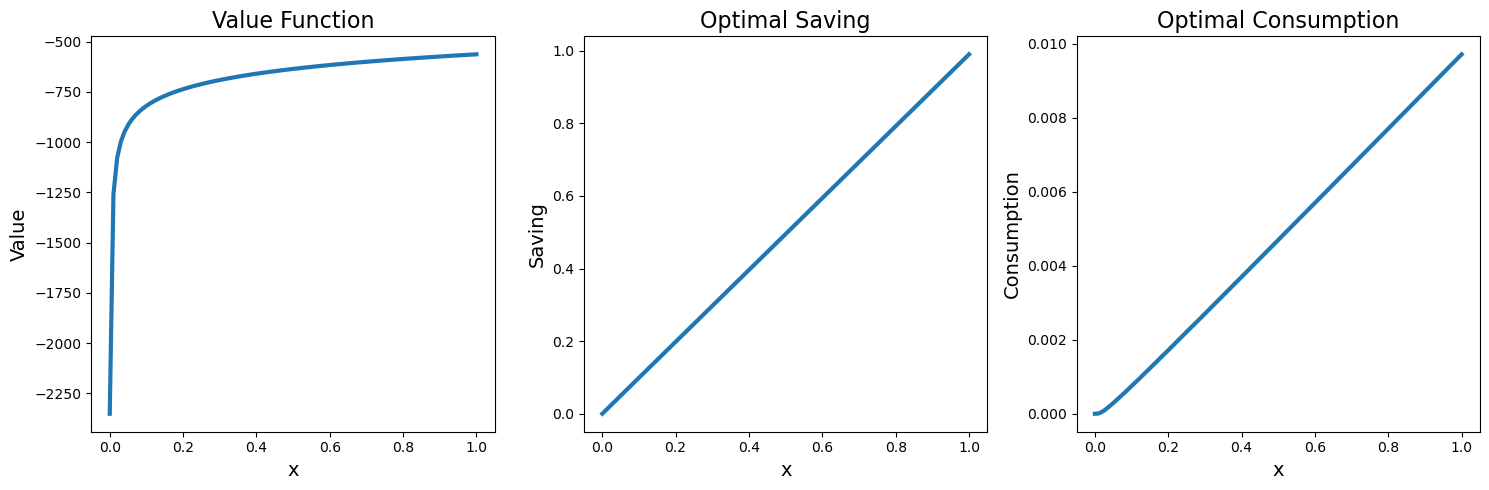

In [6]:
# Plot the graph
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(xgrid, V_star, linewidth=3)
axs[0].set_xlabel('x', fontsize=14)
axs[0].set_ylabel('Value', fontsize=14)
axs[0].set_title('Value Function', fontsize=16)

axs[1].plot(xgrid, saving, linewidth=3)
axs[1].set_xlabel('x', fontsize=14)
axs[1].set_ylabel('Saving', fontsize=14)
axs[1].set_title('Optimal Saving', fontsize=16)

axs[2].plot(xgrid, consumption, linewidth=3)
axs[2].set_xlabel('x', fontsize=14)
axs[2].set_ylabel('Consumption', fontsize=14)
axs[2].set_title('Optimal Consumption', fontsize=16)

plt.tight_layout()
plt.show()

4. Plot the consumption paths for different parameters. How and why are they different from the original solution?

In [7]:
# Assign dict to store results
Vs = {}
savings = {}
consumptions = {}
Vs[0] = V_star
savings[0] = saving
consumptions[0] = consumption

# Solve for beta = 0.99
V_0 = Vs[0]
Vs[1], savings[1], consumptions[1] = VFI(V_0, xgrid, xgridsize, Bellman_Operator, beta=0.9, progress=False)

VFI done: 182 iter, 5.28 seconds


In [8]:
# Solve for beta = 0.9999
V_0 = Vs[0]
Vs[2], savings[2], consumptions[2] = VFI(V_0, xgrid, xgridsize, Bellman_Operator, beta=0.9999, max_iter=100000, tol=1e-1, prog_freq=5000)

VFI in progress: iter 0, error 23.27199874133339
VFI in progress: iter 5000, error 14.114912011180422
VFI in progress: iter 10000, error 8.560919650219148
VFI in progress: iter 15000, error 5.192330973630305
VFI in progress: iter 20000, error 3.1492292382754385
VFI in progress: iter 25000, error 1.91005633585155
VFI in progress: iter 30000, error 1.1584787655156106
VFI in progress: iter 35000, error 0.702635322639253
VFI in progress: iter 40000, error 0.42615921096876264
VFI in progress: iter 45000, error 0.25847216506372206
VFI in progress: iter 50000, error 0.1567673732934054
VFI done: 54496 iter, 2548.56 seconds


In [9]:
# Solve for delta = 0.1
V_0 = V_star
Vs[3], savings[3], consumptions[3] = VFI(V_0, xgrid, xgridsize, Bellman_Operator, delta=0.1, progress=False)

/var/folders/jx/cvyfhs3900vf4n0lf1sp1lz80000gn/T/ipykernel_15182/108442915.py:13: RuntimeWarning: invalid value encountered in log
  Obj = lambda x_prime: -(np.log((1-delta)*x - x_prime) + beta * V_interp(x_prime)) # objective function


VFI done: 1203 iter, 41.90 seconds


In [10]:
# Compute the consumption paths for given initial state

T = 50
saving_paths = {}
consumption_paths = {}

# Solve forwards
for i in range(len(savings)):

    saving_path = np.empty(T)
    consumption_path = np.empty(T)

    # First period
    saving_path[0] = savings[i][-1]
    consumption_path[0] = consumptions[i][-1]

    # Interpolate policy functions
    saving_interp = interp1d(xgrid, savings[i], kind='linear', bounds_error=True)
    cons_interp = interp1d(xgrid, consumptions[i], kind='linear', bounds_error=True)
    
    # Compute forwards
    for t in range(1, T):
        saving_path[t] = saving_interp(saving_path[t-1])
        consumption_path[t] = cons_interp(saving_path[t-1])

    saving_paths[i] = saving_path
    consumption_paths[i] = consumption_path

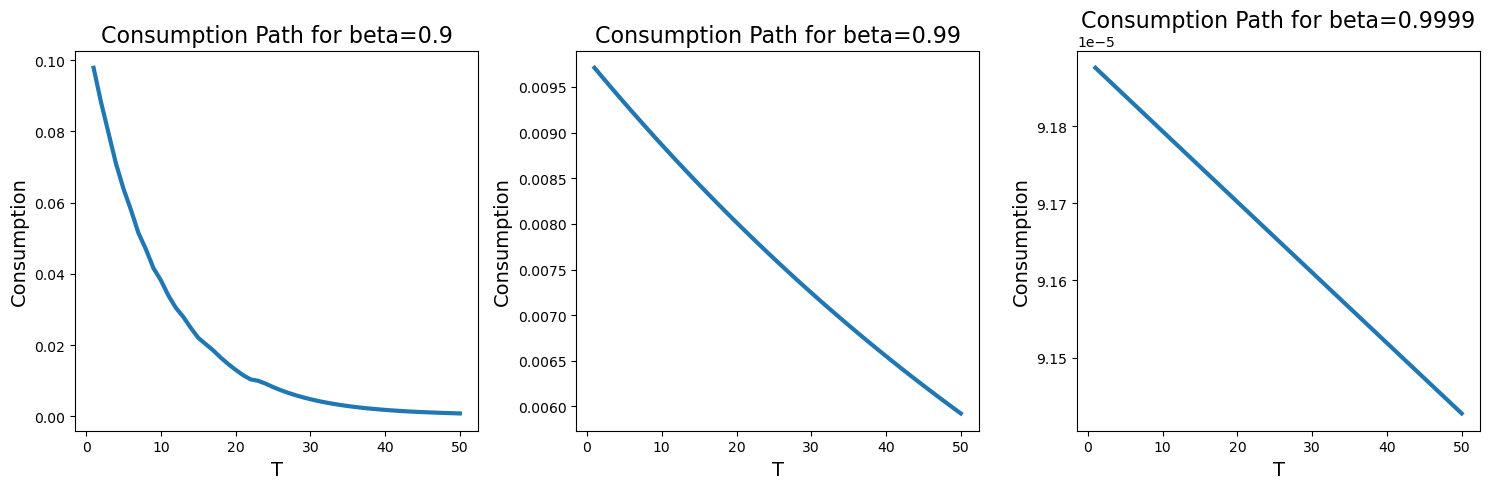

In [11]:
# Plot the graph
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

i = 1
axs[0].plot(range(1, T+1), consumption_paths[i], linewidth=3)
axs[0].set_xlabel('T', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=14)
axs[0].set_title('Consumption Path for beta=0.9', fontsize=16)

i = 0
axs[1].plot(range(1, T+1), consumption_paths[i], linewidth=3)
axs[1].set_xlabel('T', fontsize=14)
axs[1].set_ylabel('Consumption', fontsize=14)
axs[1].set_title('Consumption Path for beta=0.99', fontsize=16)

i = 2
axs[2].plot(range(1, T+1), consumption_paths[i], linewidth=3)
axs[2].set_xlabel('T', fontsize=14)
axs[2].set_ylabel('Consumption', fontsize=14)
axs[2].set_title('Consumption Path for beta=0.9999', fontsize=16)

plt.tight_layout()
plt.show()

**Takeaways**:

1] Since one values current more, the consumption is decreasing over time.

2] As $\beta$ increases, one consumes less since he is more patient.

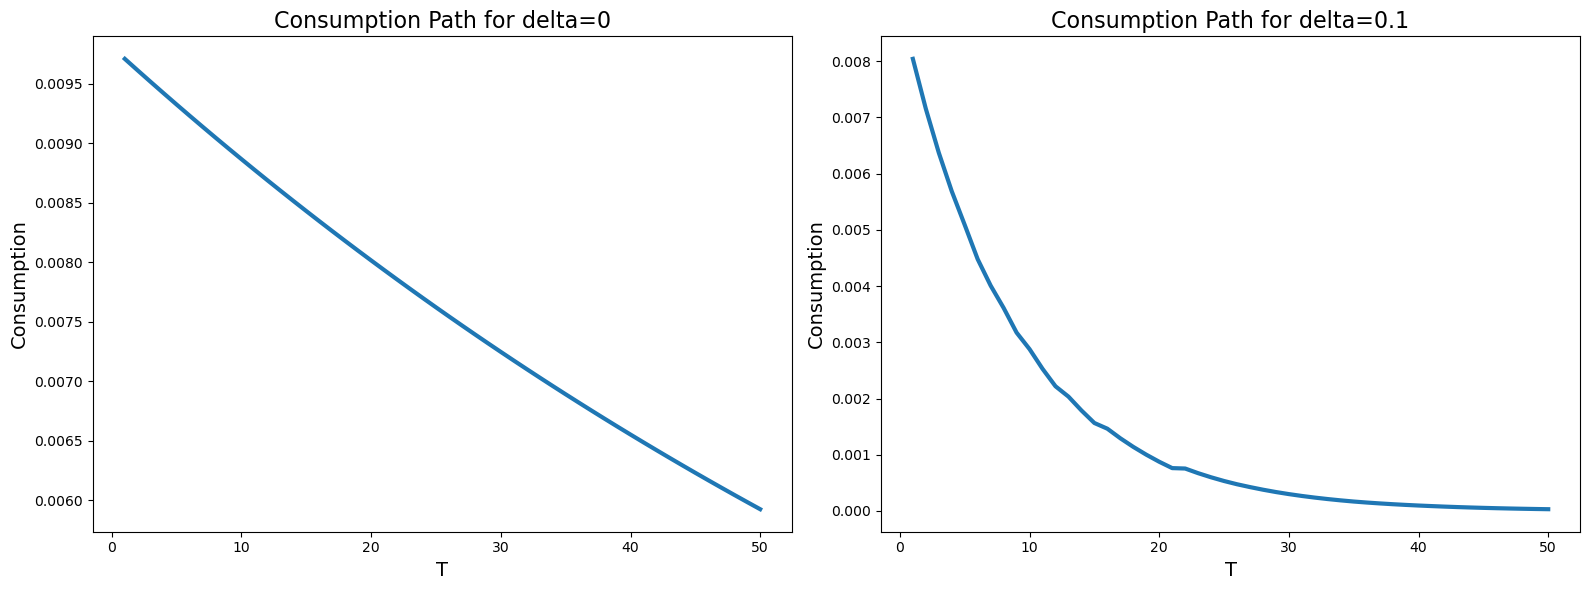

In [12]:
# Plot the graph
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

i = 0
axs[0].plot(range(1, T+1), consumption_paths[i], linewidth=3)
axs[0].set_xlabel('T', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=14)
axs[0].set_title('Consumption Path for delta=0', fontsize=16)

i = 3
axs[1].plot(range(1, T+1), consumption_paths[i], linewidth=3)
axs[1].set_xlabel('T', fontsize=14)
axs[1].set_ylabel('Consumption', fontsize=14)
axs[1].set_title('Consumption Path for delta=0.1', fontsize=16)

plt.tight_layout()
plt.show()

**Takeaways**:

1] As $\delta$ increases, one consumes less since they lose some of their case due to the depreciation.

---

### Problem 2: Finite-horizon Cake-eating Problem

1. What is the state variable?

\begin{equation*}
x_t: \text{the cake remaining at the start of each period t}
\end{equation*}

2. Set up the Bellman Equation

\begin{equation*}
V_t(x_t) = max_{x_{t+1}} \; ln(c_t) + \beta V_{t+1}(x_{t+1})
\end{equation*}

\begin{equation*}
\text{s.t.} \; c_t + x_{t+1} = (1-\delta)x_t
\end{equation*}

3. What is Bellman Equation when $t=T$?

\begin{equation*}
V_T(x_T) = max_{x_{T+1}} \; ln(c_T)
\end{equation*}

\begin{equation*}
\text{s.t.} \; c_T + x_{T+1} = (1-\delta)x_T
\end{equation*}

4. Solve the problem backwards

In [13]:
Ts = [50, 500] 
results = {} # dict to store results

# Solve backwards
for T in Ts:
    
    # dict to store results
    Vs = {}
    savings = {}
    consumptions = {}

    # Last period
    Vs[T] = np.log(xgrid)
    savings[T] = np.zeros(xgridsize)
    consumptions[T] = xgrid

    # Solve backwards
    for t in range(T, 1, -1):
        Vs[t-1], savings[t-1] = Bellman_Operator(Vs[t], beta, delta, xgrid, xgridsize)
        consumptions[t-1] = (1-delta)*xgrid - savings[t-1]

    # Store results in the dictionary
    results[T] = {'Vs': Vs, 'Savings': savings, 'Cons': consumptions}

5. Plot the two consumption paths. How and why are they different?

In [14]:
# Compute the consumption paths for given initial state

saving_paths = {}
consumption_paths = {}

# Solve forwards
for T in Ts:

    saving_path = np.empty(T)
    consumption_path = np.empty(T)

    # First period
    saving_path[0] = results[T]['Savings'][1][-1]
    consumption_path[0] = results[T]['Cons'][1][-1]

    # Compute forwards
    for t in range(1, T-1):
        saving_interp = interp1d(xgrid, results[T]['Savings'][t+1], kind='linear', bounds_error=True)
        cons_interp = interp1d(xgrid, results[T]['Cons'][t+1], kind='linear', bounds_error=True)
        
        saving_path[t] = saving_interp(saving_path[t-1])
        consumption_path[t] = cons_interp(saving_path[t-1])

    # Last period
    saving_path[-1] = 0
    consumption_path[-1] = (1-delta)*saving_path[-2]

    saving_paths[T] = saving_path
    consumption_paths[T] = consumption_path

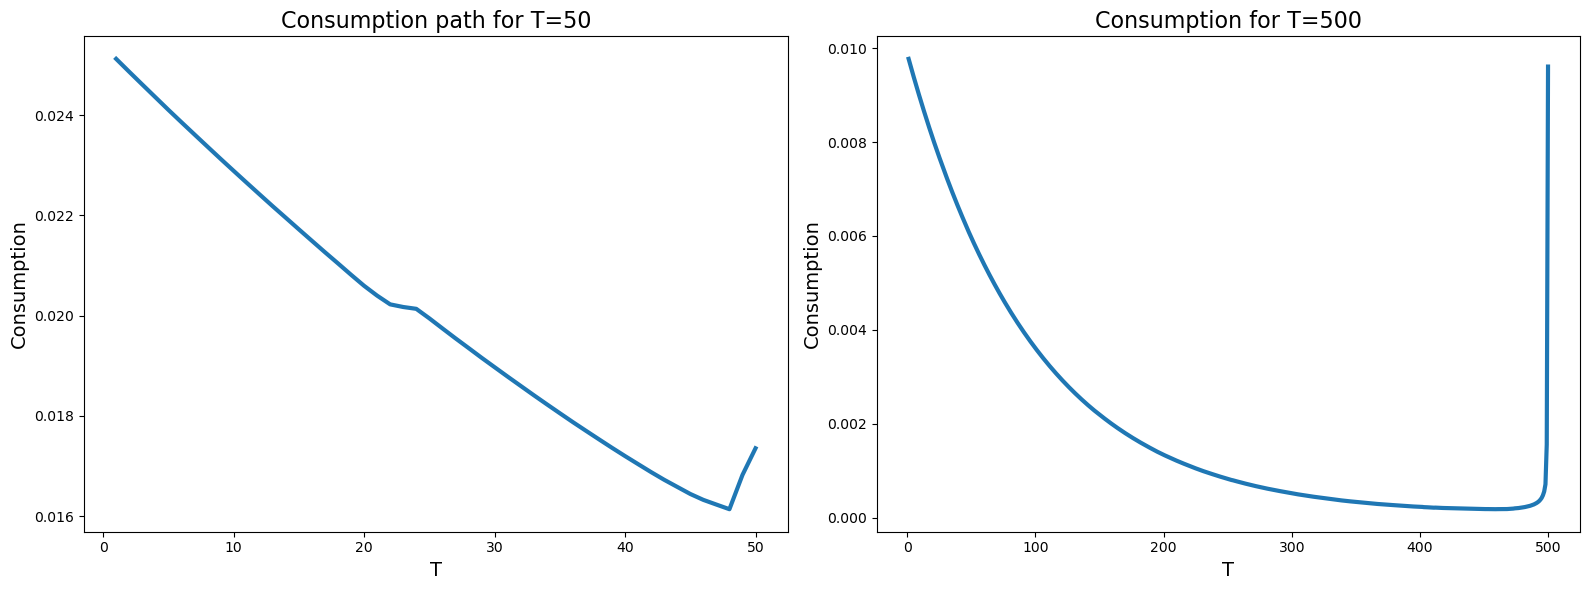

In [15]:
# Plot the graph
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

T = 50
axs[0].plot(range(1, T+1), consumption_paths[T], linewidth=3)
axs[0].set_xlabel('T', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=14)
axs[0].set_title('Consumption path for T=50', fontsize=16)

T = 500
axs[1].plot(range(1, T+1), consumption_paths[T], linewidth=3)
axs[1].set_xlabel('T', fontsize=14)
axs[1].set_ylabel('Consumption', fontsize=14)
axs[1].set_title('Consumption for T=500', fontsize=16)

plt.tight_layout()
plt.show()

**Takeaways**:

1] One smoothes his consumption profile over the lifecycle. The consumption is decreasing over time since he values consumption in near future more.

2] At the last period, he consumes all the remainings.

---

### Problem 3: FOC from Bellman

1. Derive the FOC

\begin{equation*}
u^\prime(c) = \beta V^\prime(a^\prime)
\end{equation*}

2. How is the FOC related to the Euler Equation?

By the envelope theorem,

\begin{equation*}
V^\prime(a) = u^\prime(c) (1+r)
\end{equation*}

Plugging this into the FOC,

\begin{equation*}
u^\prime(c) = \beta (1+r) u^\prime(c^\prime)
\end{equation*}

3. Compute optimal consumption using the FOC

In [16]:
# Set parameters
beta = 0.99
r = (1/beta) - 1
y = 1

# Construct a grids
amin = 0.0; amax = 1.0; agridsize = 100
curv = 1.0
agrid = np.array([amin + (amax-amin) * (a/(agridsize-1))**curv for a in range(agridsize)])

# Etc
max_iter = 10000
tol = 1e-6

In [17]:
# Define EGM operator
def EGM_Operator(c_old, beta, r, y, agrid, agridsize):

    c_tilde = np.empty(agridsize)
    a_tilde = np.empty(agridsize)

    # Compute the Euler Eq.
    for (aidx, ap) in enumerate(agrid):
        c_tilde[aidx] = (beta * (1+r) * c_old[aidx]**(-1))**(-1)
        a_tilde[aidx] = (c_tilde[aidx] + ap - y) / (1+r)

    # Compute today's optimal choices
    c_interp = interp1d(a_tilde, c_tilde, kind='linear', bounds_error=False, fill_value='extrapolate')
    c_new = c_interp(agrid)
    saving = (1+r)*agrid + y - c_new

    return c_new, saving

In [18]:
# Define EGM iteration function
def EGM_Iteration(c_0, beta, r, y, agrid, agridsize, max_iter, tol, EGM_Operator, progress=True, prog_freq=50):

    start_time = time.time()
    c_old = c_0

    # Iterate the EGM operator until convergence
    for iter in range(max_iter):
        c_new, saving = EGM_Operator(c_old, beta, r, y, agrid, agridsize)

        # Check convergence & update
        error = np.max(np.abs(c_new - c_old))
        if error < tol:
            c_star = c_new
            print(f"EGM done: {iter} iter, {time.time() - start_time:.2f} seconds")
            return c_star, saving
        else:
            c_old = c_new

        # Show progress
        if progress == True and iter % prog_freq == 0:
            print(f"EGM in progress: iter {iter}, error {error}")
    
    if iter == max_iter - 1:
        print("EGM Error: No convergence")

In [19]:
# Solve
c_0 = np.linspace(1, 2, agridsize)
c_star, saving = EGM_Iteration(c_0, beta, r, y, agrid, agridsize, max_iter, tol, EGM_Operator)

EGM in progress: iter 0, error 0.4949494949494948
EGM in progress: iter 50, error 0.0003704780373869898
EGM in progress: iter 100, error 8.950128617701836e-05
EGM in progress: iter 150, error 3.622048128848476e-05
EGM in progress: iter 200, error 1.77794612947757e-05
EGM in progress: iter 250, error 9.572521359357822e-06
EGM in progress: iter 300, error 5.413978345636394e-06
EGM in progress: iter 350, error 3.1480040818543387e-06
EGM in progress: iter 400, error 1.860064053005317e-06
EGM in progress: iter 450, error 1.1095180663112103e-06
EGM done: 461 iter, 0.05 seconds


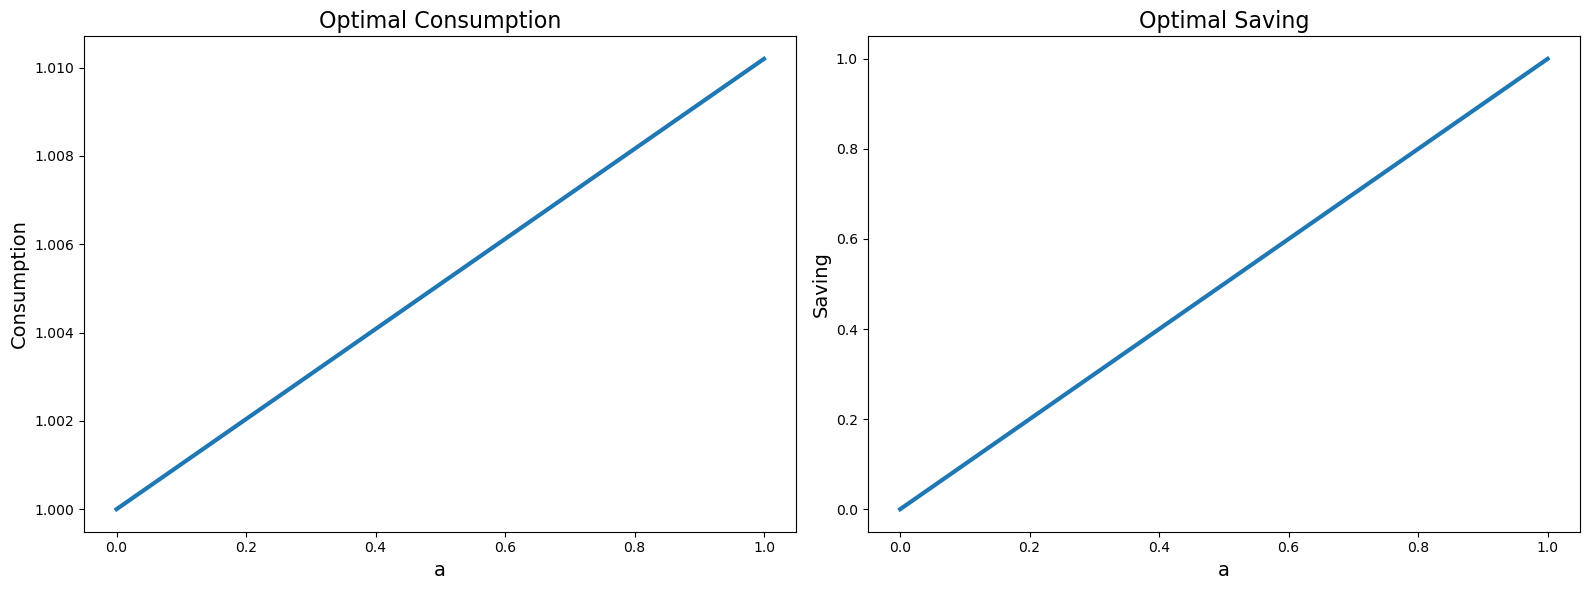

In [20]:
# Plot the graph
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(agrid, c_star, linewidth=3)
axs[0].set_xlabel('a', fontsize=14)
axs[0].set_ylabel('Consumption', fontsize=14)
axs[0].set_title('Optimal Consumption', fontsize=16)

axs[1].plot(agrid, saving, linewidth=3)
axs[1].set_xlabel('a', fontsize=14)
axs[1].set_ylabel('Saving', fontsize=14)
axs[1].set_title('Optimal Saving', fontsize=16)

plt.tight_layout()
plt.show()

**Takeaways**:

1] Optimal consumption and saving increase with the asset given.

2] Compared to the method in the class, the EGM is more accurate and faster. This is because it is using the Euler equation more efficiently.